## Практическая работа

## Цели практической работы

*  решить реальную задачу;
*  потренироваться в обработке данных;
*  обучить различные модели классификации, подобрать гиперпараметры и выбрать лучшую модель;
*  добиться наилучшего качества в задаче.

## Что входит в практическую работу

*  исследование датасета и обработка данных (работа с пропущенными и ошибочными значениями);
*  обучение различных моделей классификации с параметрами по умолчанию;
*  подбор гиперпараметров моделей;
*  смешивание моделей;
*  оценка качества моделей.

## Что оценивается

*  Выполнены все этапы задания: код запускается, отрабатывает без ошибок; подробно и обоснованно написаны текстовые выводы, где это требуется.

## Формат сдачи
Выполните предложенные задания: впишите свой код (или, если требуется, текст) в ячейки после комментариев. 

*Комментарии — это текст, который начинается с символа #. Например: # ваш код здесь.*

Сохраните изменения, используя опцию Save and Checkpoint из вкладки меню File или кнопку Save and Checkpoint на панели инструментов. Итоговый файл в формате .ipynb (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

### 1. Загрузите тренировочные и тестовые датасеты

In [1]:
#!pip install category_encoders
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

import warnings
warnings.filterwarnings("ignore")

Xtrain = pd.read_csv("TrainData.csv")
Xtest = pd.read_csv("TestData.csv")

### 2. Изучите тренировочные и тестовые данные на наличие:
- пропусков,
- ошибочных значений.

Обработайте пропуски и ошибочные значения способом, выбранным по своему усмотрению.

In [2]:
# Ваш код здесь
Xtrain.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0


In [3]:
Xtrain.describe(include = ['float64', 'int64', 'object'])

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,7500.000000,7425.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,5625.000000,7500.000000,7500.000000,7500.000000,7490.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,38.579600,238.905308,1.903850e+05,0.238933,10.083200,0.238934,0.240556,0.238933,23.893333,0.238933,1068.693992,88.974933,40.670800,0.238955,0.238933
std,13.647719,76.198282,1.058674e+05,0.151738,2.546071,0.190283,0.147371,0.193365,4.451530,0.087708,7430.344770,404.517032,12.330051,0.041685,0.426460
min,17.000000,64.259070,1.930200e+04,0.000029,1.000000,0.049127,0.000000,0.009499,5.970149,0.113590,0.000000,0.000000,1.000000,0.000080,0.000000
25%,28.000000,218.593930,1.180190e+05,0.171817,9.000000,0.049127,0.115721,0.066581,25.606721,0.113590,0.000000,0.000000,40.000000,0.244418,0.000000
50%,37.000000,218.593930,1.795685e+05,0.179322,10.000000,0.098837,0.241573,0.103024,25.606721,0.300298,0.000000,0.000000,40.000000,0.244418,0.000000
75%,47.000000,218.593930,2.394418e+05,0.239316,12.000000,0.445026,0.439103,0.444334,25.606721,0.300298,0.000000,0.000000,45.000000,0.244418,0.000000
max,90.000000,575.396825,1.226583e+06,0.729323,16.000000,0.445026,0.482222,0.484375,25.606721,0.300298,99999.000000,4356.000000,99.000000,0.466666,1.000000


In [4]:
def print_info(df):
    print('Количество полностью заполненных объектов из всей выборки: ', len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки: ', round(len(df.dropna()) / len(df) * 100, 2))
    
print_info(Xtrain)

Количество полностью заполненных объектов из всей выборки:  5567
Процент полностью заполненных объектов из всей выборки:  74.23


In [5]:
print_info(Xtest)

Количество полностью заполненных объектов из всей выборки:  2500
Процент полностью заполненных объектов из всей выборки:  100.0


In [6]:
missing_values = ((Xtrain.isna().sum() / len(Xtrain)) * 100).sort_values(ascending = False)
missing_values

f7        25.000000
f2         1.000000
f11        0.133333
f1         0.000000
f3         0.000000
f4         0.000000
f5         0.000000
f6         0.000000
f8         0.000000
f9         0.000000
f10        0.000000
f12        0.000000
f13        0.000000
f14        0.000000
target     0.000000
dtype: float64

In [7]:
df_copy = Xtrain.copy()
df_copy = df_copy[df_copy['f2'].notna()]
df_copy = df_copy[df_copy['f11'].notna()]
df_copy = df_copy[df_copy['f7'].notna()]
df_copy

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7494,40,218.593930,120277,0.171817,9,0.049127,0.071672,0.009499,25.606721,0.300298,0.0,0,40,0.249475,0
7496,25,218.593930,104439,0.179322,10,0.049127,0.131370,0.103024,25.606721,0.113590,0.0,0,50,0.244418,0
7497,50,218.593930,162632,0.171817,9,0.445026,0.482222,0.444334,25.606721,0.300298,0.0,0,45,0.244418,0
7498,51,276.771005,174824,0.171817,9,0.049127,0.093897,0.103024,25.606721,0.300298,8614.0,0,40,0.244418,1


In [8]:
print_info(df_copy)

Количество полностью заполненных объектов из всей выборки:  5567
Процент полностью заполненных объектов из всей выборки:  100.0


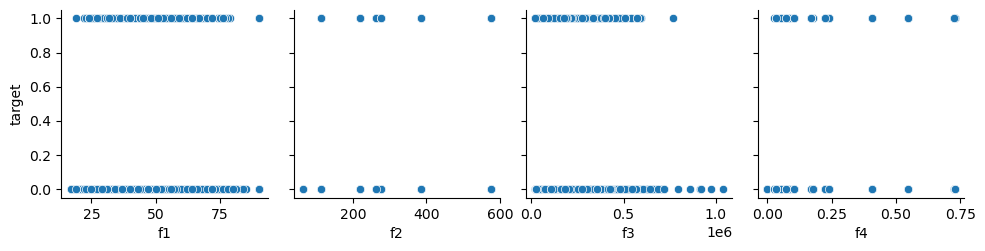

In [9]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f1', 'f2', 'f3', 'f4'],
    y_vars = ['target'],
)

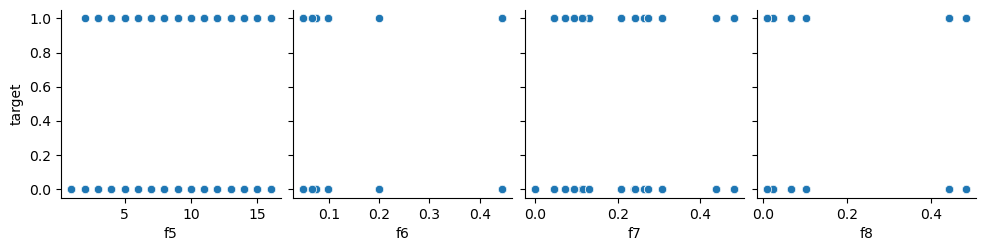

In [10]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f5', 'f6', 'f7', 'f8'],
    y_vars = ['target'],
)

## из графика зависимости target = f(f5) видно, что имеется шагообразное разделение значений

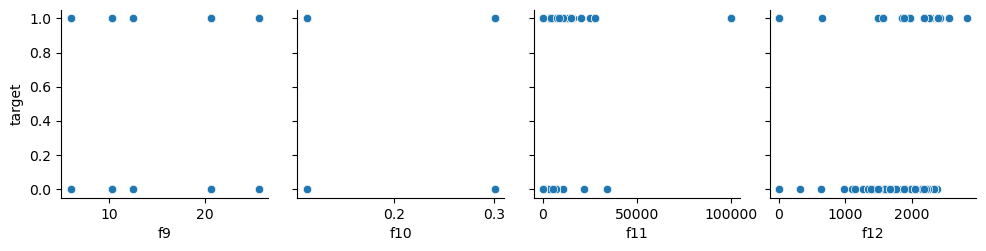

In [11]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f9', 'f10', 'f11', 'f12'],
    y_vars = ['target'],
)

Переменная f11 имеет выбросы это видно из графика

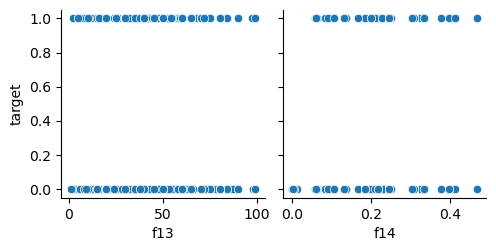

In [12]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f13', 'f14'],
    y_vars = ['target'],
)

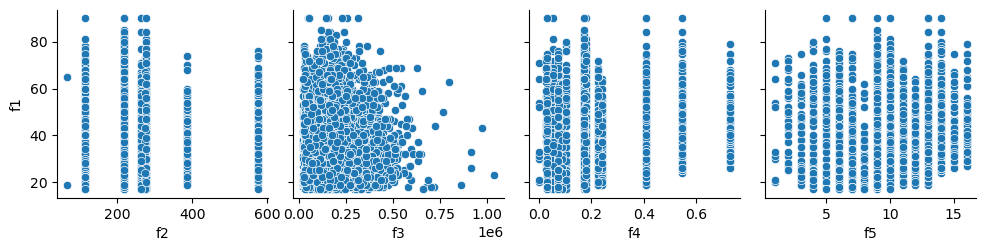

In [13]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f2', 'f3', 'f4', 'f5'],
    y_vars = ['f1'],
)

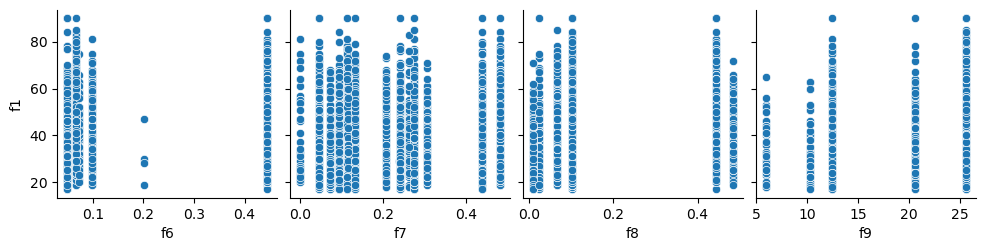

In [14]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f6', 'f7', 'f8', 'f9'],
    y_vars = ['f1'],
)

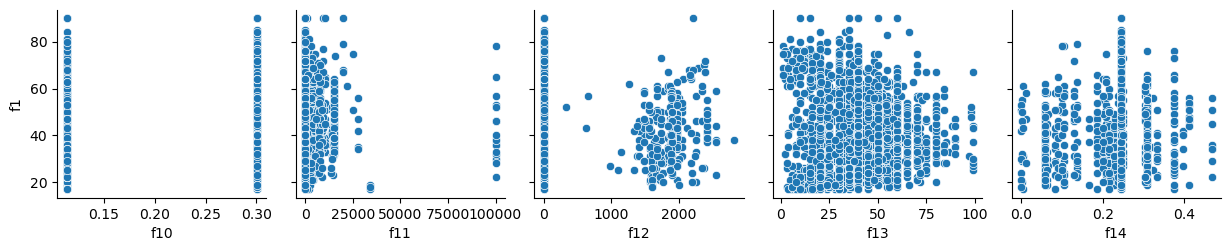

In [15]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f10', 'f11', 'f12', 'f13', 'f14'],
    y_vars = ['f1'],
)

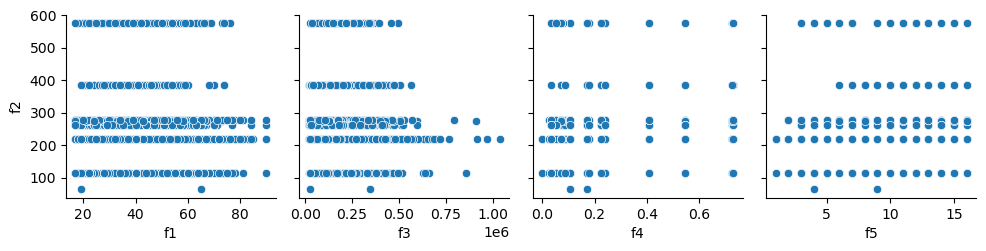

In [16]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f1', 'f3', 'f4', 'f5'],
    y_vars = ['f2'],
)

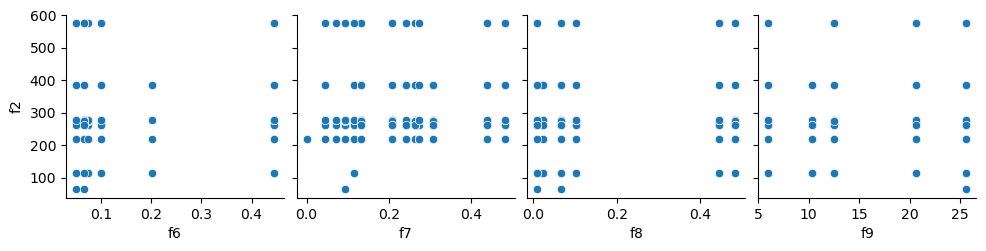

In [17]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f6', 'f7', 'f8', 'f9'],
    y_vars = ['f2'],
)

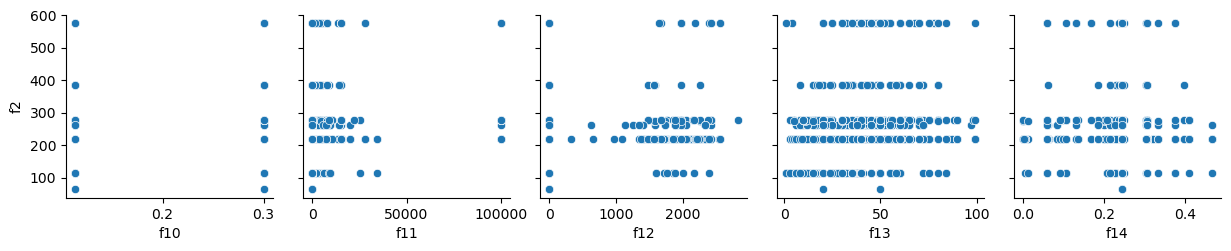

In [18]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f10', 'f11', 'f12', 'f13', 'f14'],
    y_vars = ['f2'],
)

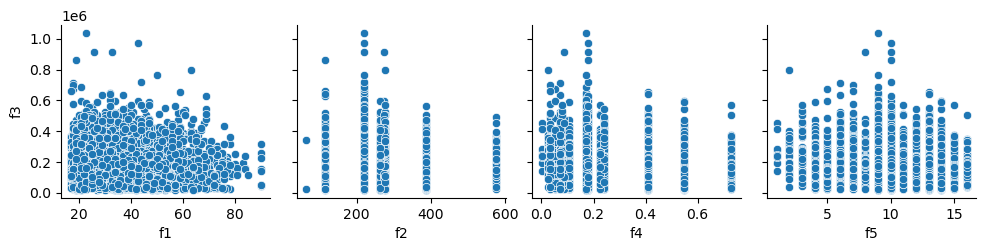

In [19]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f1', 'f2', 'f4', 'f5'],
    y_vars = ['f3'],
)

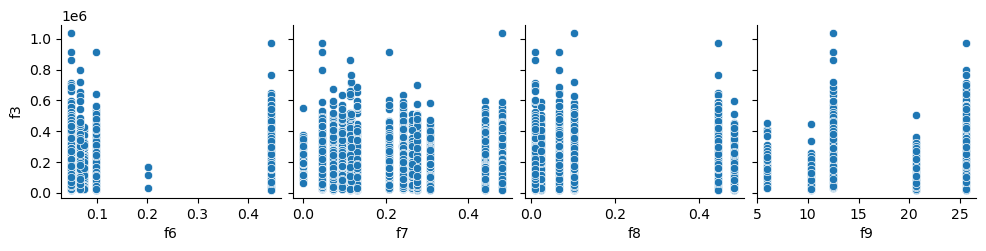

In [20]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f6', 'f7', 'f8', 'f9'],
    y_vars = ['f3'],
)

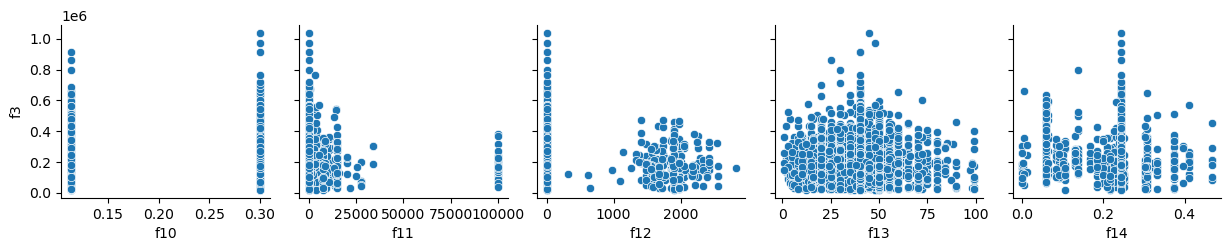

In [21]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f10', 'f11', 'f12', 'f13', 'f14'],
    y_vars = ['f3'],
)

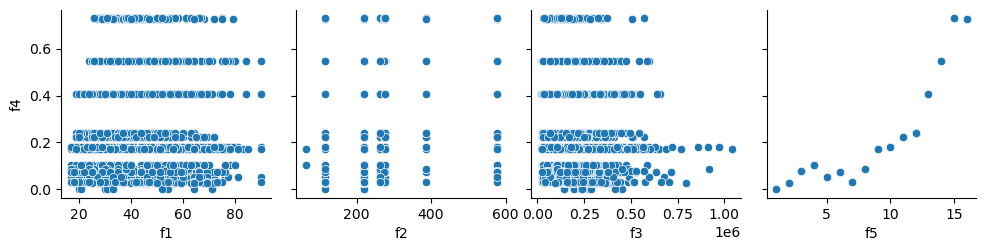

In [22]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f1', 'f2', 'f3', 'f5'],
    y_vars = ['f4'],
)

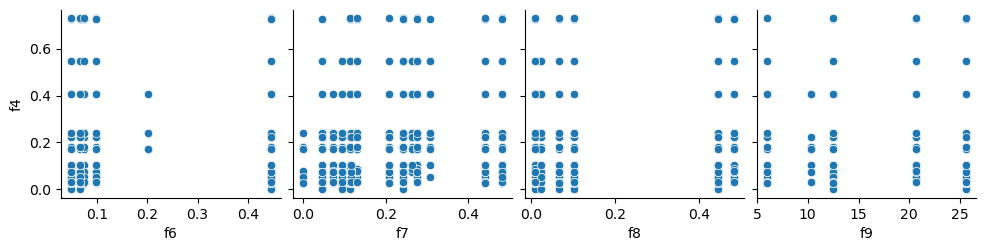

In [23]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f6', 'f7', 'f8', 'f9'],
    y_vars = ['f4'],
)

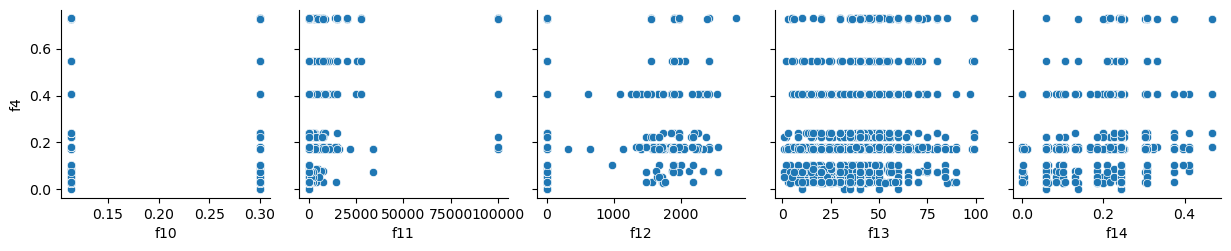

In [24]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f10', 'f11', 'f12', 'f13', 'f14'],
    y_vars = ['f4'],
)

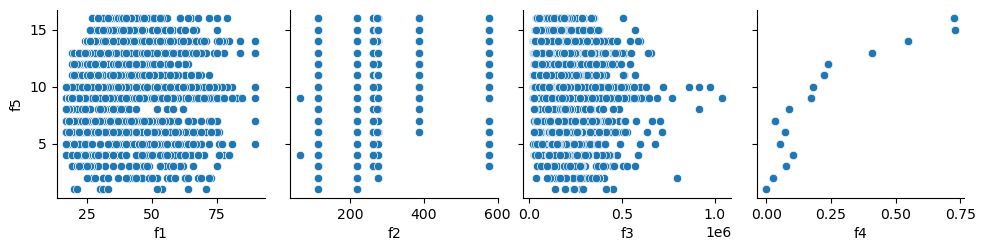

In [25]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f1', 'f2', 'f3', 'f4'],
    y_vars = ['f5'],
)

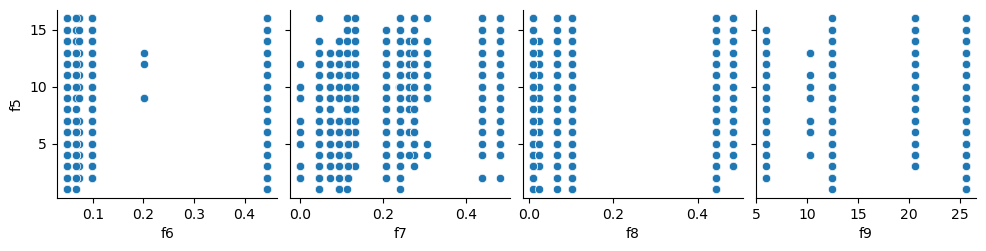

In [26]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f6', 'f7', 'f8', 'f9'],
    y_vars = ['f5'],
)

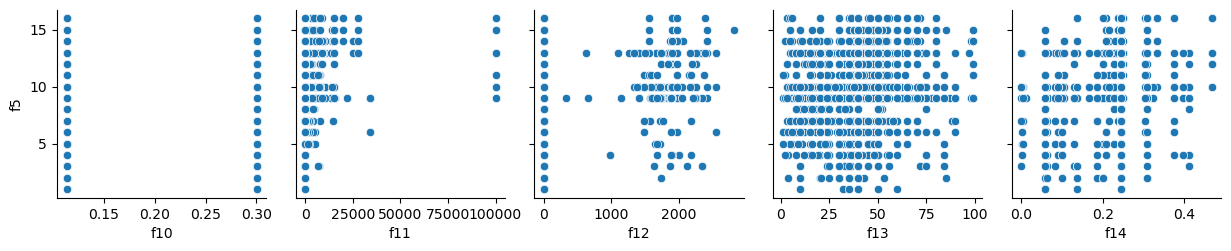

In [27]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f10', 'f11', 'f12', 'f13', 'f14'],
    y_vars = ['f5'],
)

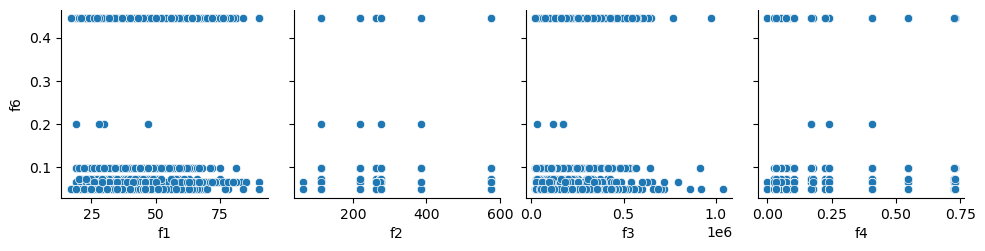

In [28]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f1', 'f2', 'f3', 'f4'],
    y_vars = ['f6'],
)

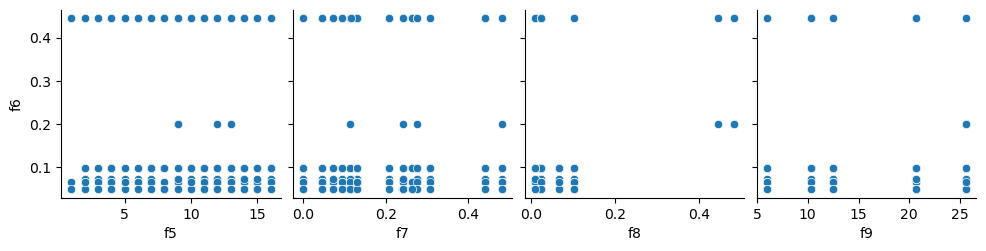

In [29]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f5', 'f7', 'f8', 'f9'],
    y_vars = ['f6'],
)

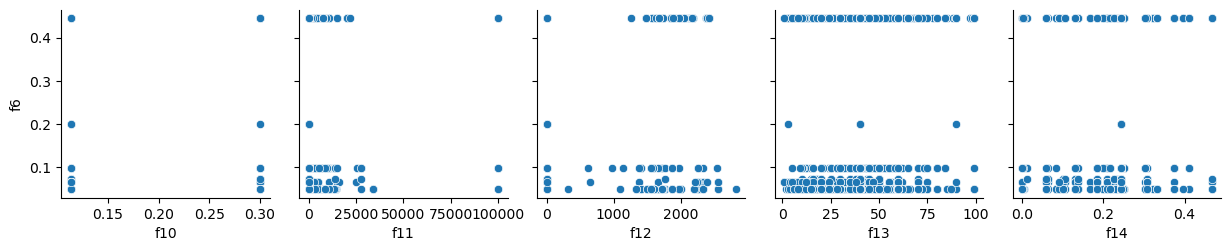

In [30]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f10', 'f11', 'f12', 'f13', 'f14'],
    y_vars = ['f6'],
)

### В переменной f6 похоже, что имеются выбросы при величине этой переменной равной 0.2

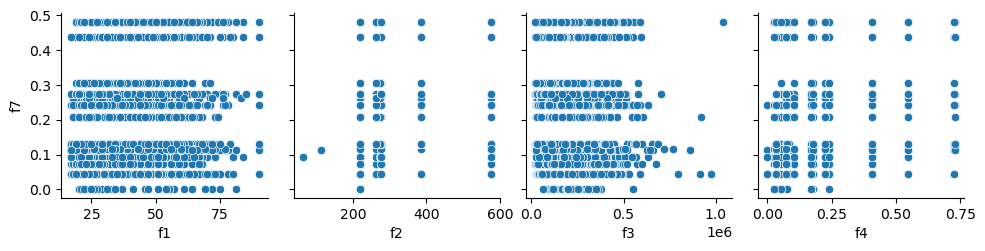

In [31]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f1', 'f2', 'f3', 'f4'],
    y_vars = ['f7'],
)

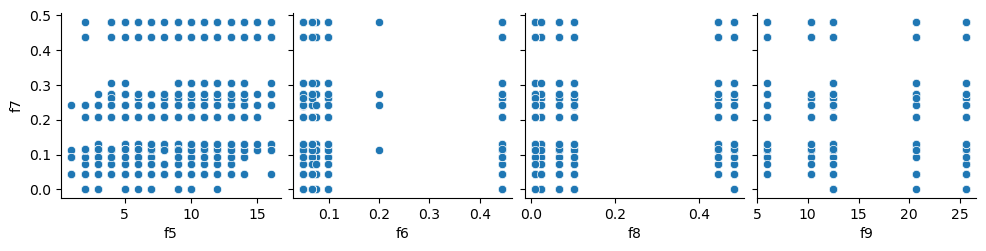

In [32]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f5', 'f6', 'f8', 'f9'],
    y_vars = ['f7'],
)

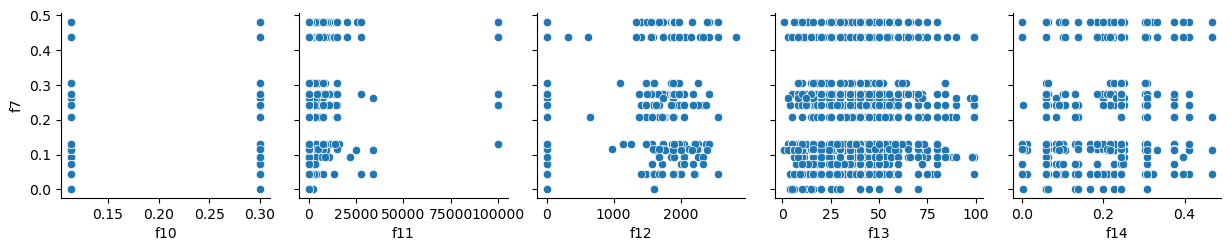

In [33]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f10', 'f11', 'f12', 'f13', 'f14'],
    y_vars = ['f7'],
)

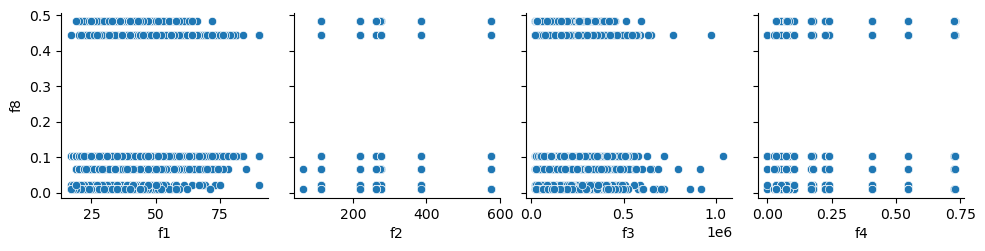

In [34]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f1', 'f2', 'f3', 'f4'],
    y_vars = ['f8'],
)

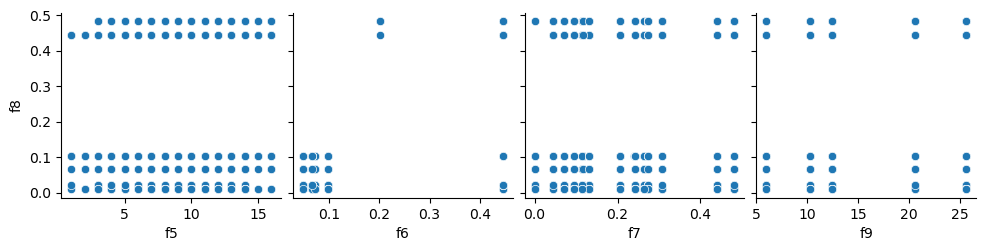

In [35]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f5', 'f6', 'f7', 'f9'],
    y_vars = ['f8'],
)

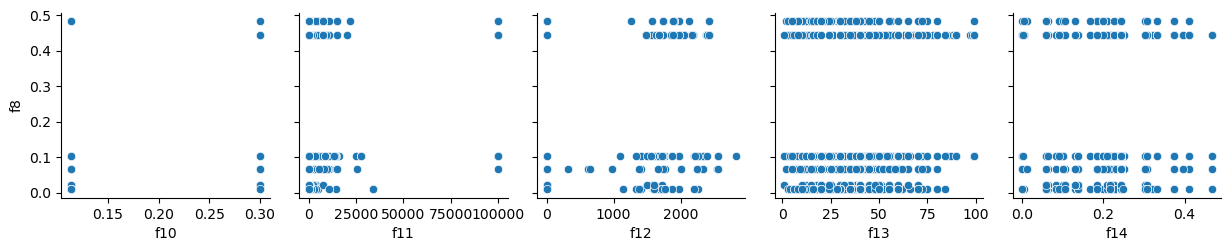

In [36]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f10', 'f11', 'f12', 'f13', 'f14'],
    y_vars = ['f8'],
)

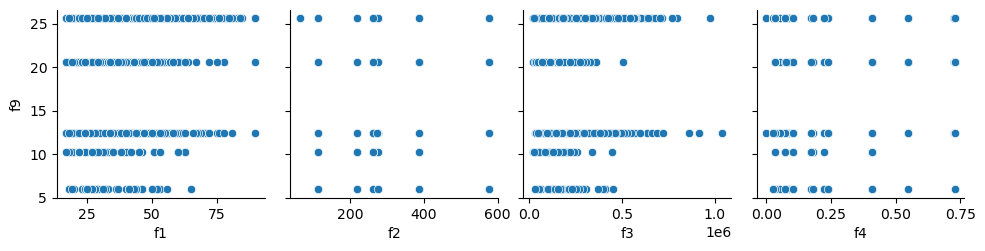

In [37]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f1', 'f2', 'f3', 'f4'],
    y_vars = ['f9'],
)

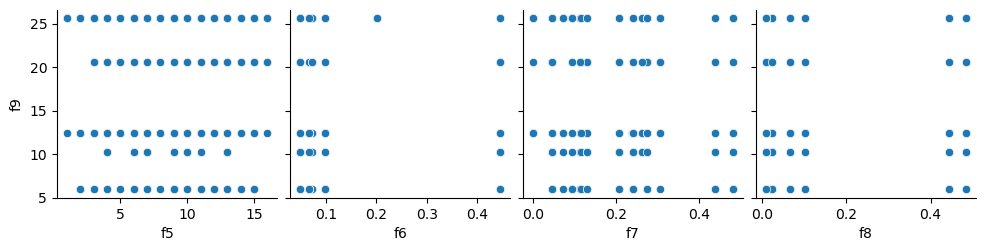

In [38]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f5', 'f6', 'f7', 'f8'],
    y_vars = ['f9'],
)

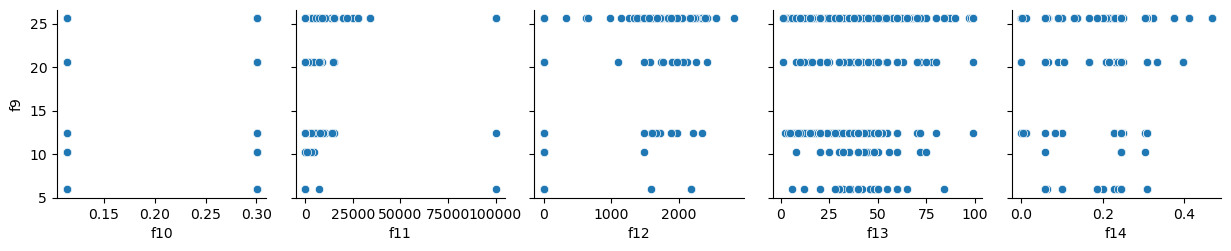

In [39]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f10', 'f11', 'f12', 'f13', 'f14'],
    y_vars = ['f9'],
)

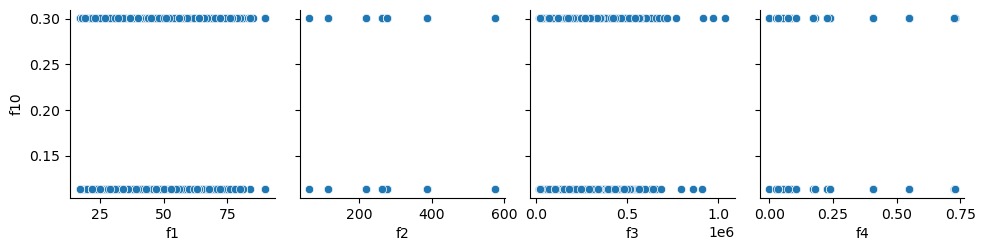

In [40]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f1', 'f2', 'f3', 'f4'],
    y_vars = ['f10'],
)

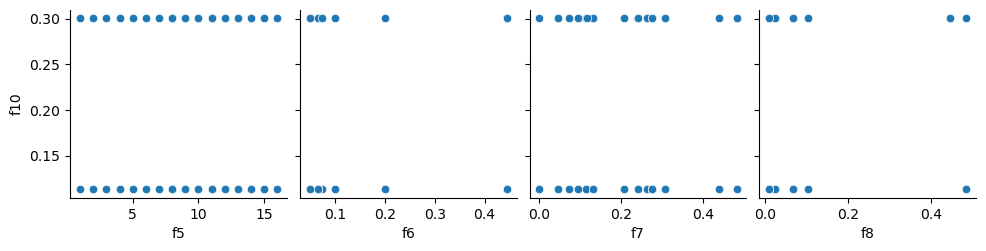

In [41]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f5', 'f6', 'f7', 'f8'],
    y_vars = ['f10'],
)

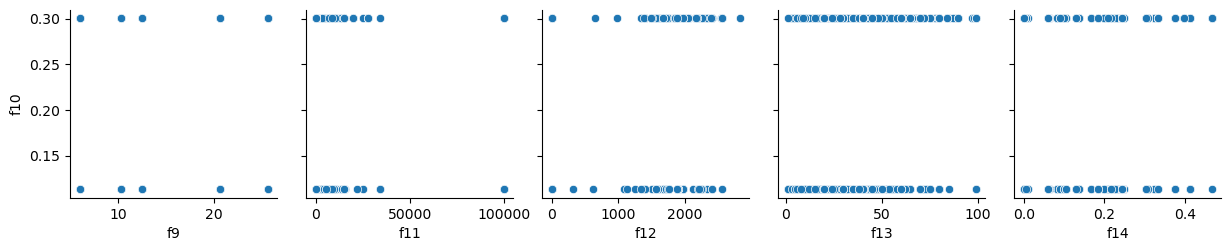

In [42]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f9', 'f11', 'f12', 'f13', 'f14'],
    y_vars = ['f10'],
)

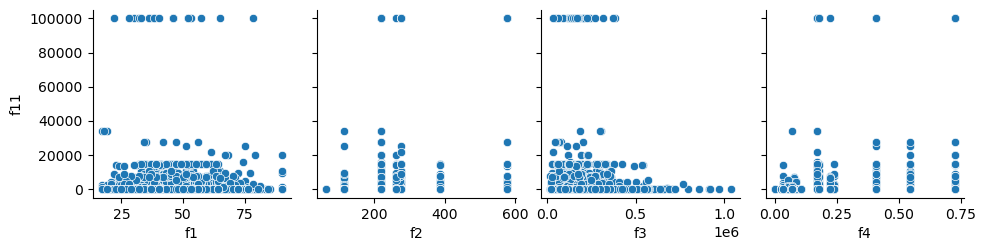

In [43]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f1', 'f2', 'f3', 'f4'],
    y_vars = ['f11'],
)

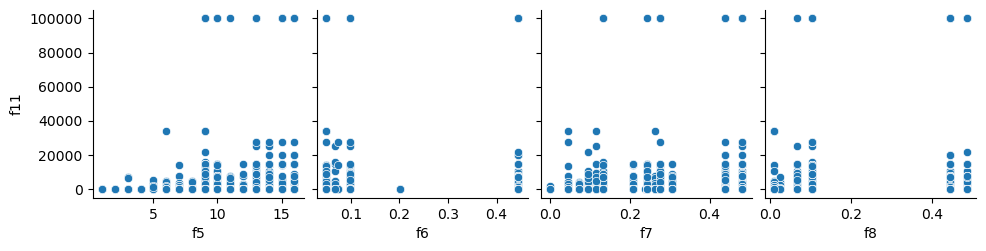

In [44]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f5', 'f6', 'f7', 'f8'],
    y_vars = ['f11'],
)

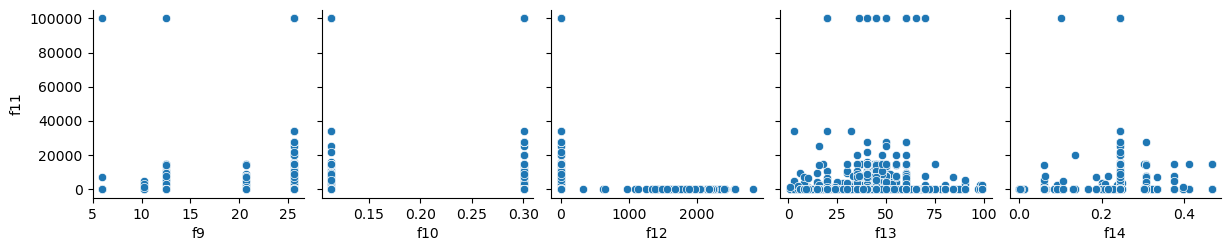

In [45]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f9', 'f10', 'f12', 'f13', 'f14'],
    y_vars = ['f11'],
)

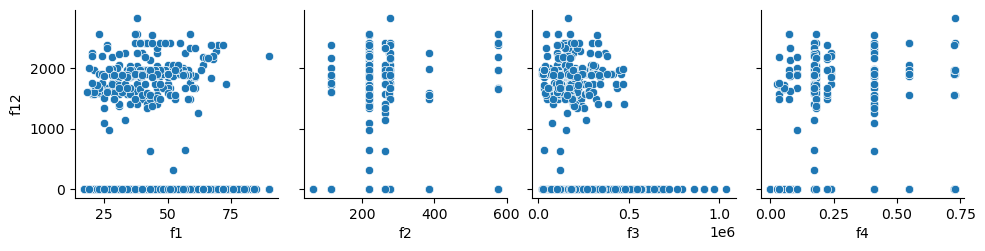

In [46]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f1', 'f2', 'f3', 'f4'],
    y_vars = ['f12'],
)

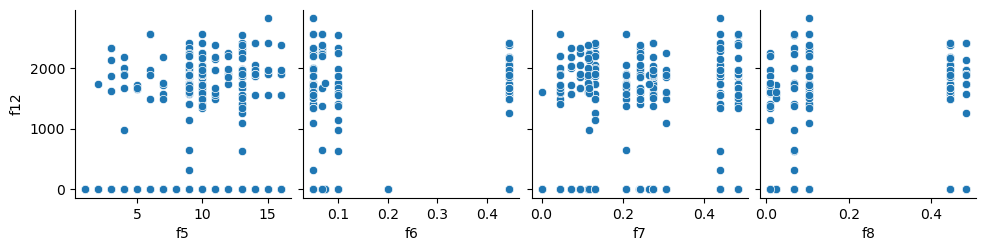

In [47]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f5', 'f6', 'f7', 'f8'],
    y_vars = ['f12'],
)

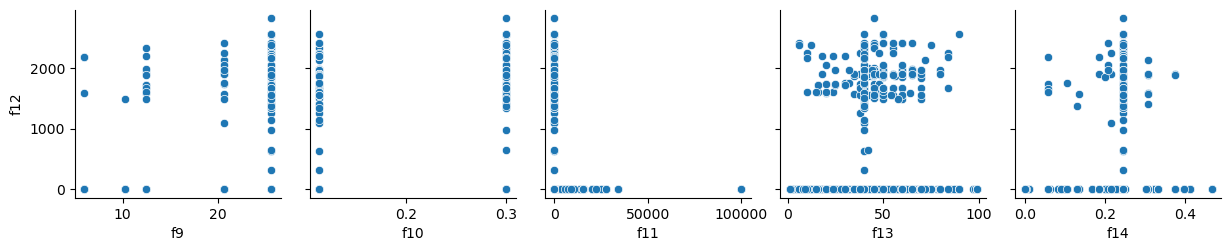

In [48]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f9', 'f10', 'f11', 'f13', 'f14'],
    y_vars = ['f12'],
)

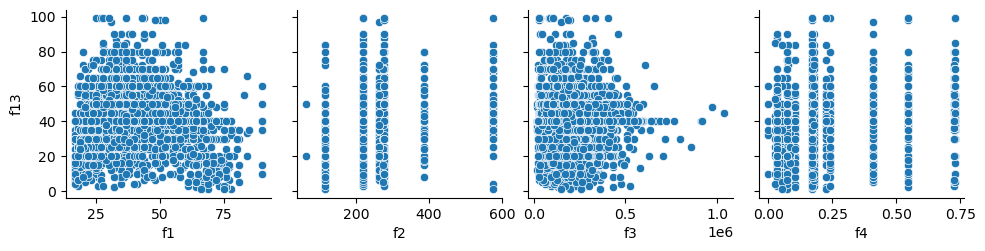

In [49]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f1', 'f2', 'f3', 'f4'],
    y_vars = ['f13'],
)

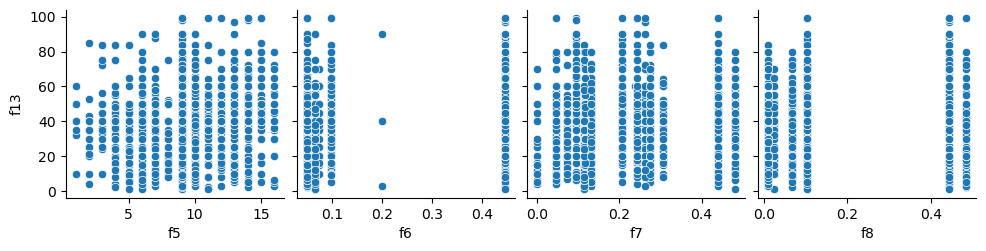

In [50]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f5', 'f6', 'f7', 'f8'],
    y_vars = ['f13'],
)

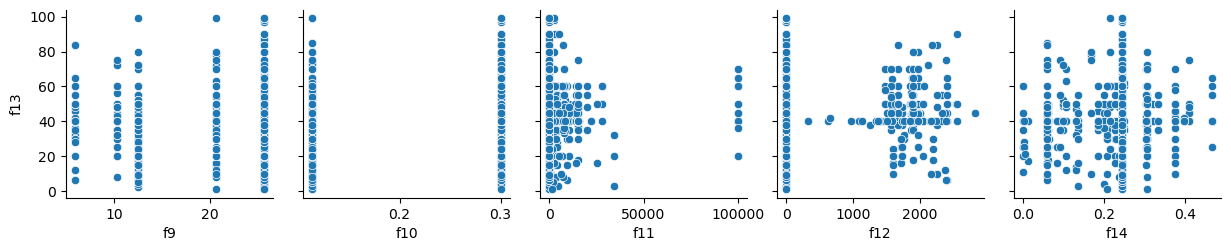

In [51]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f9', 'f10', 'f11', 'f12', 'f14'],
    y_vars = ['f13'],
)

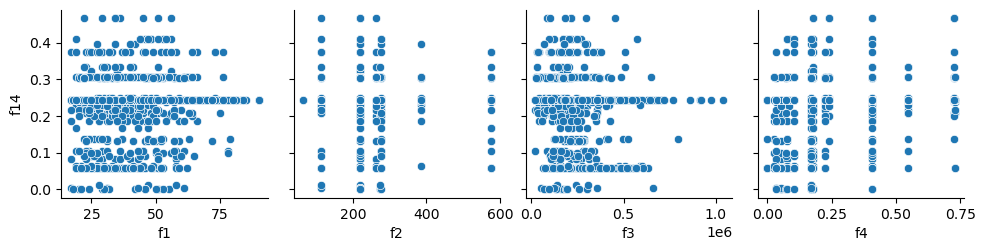

In [52]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f1', 'f2', 'f3', 'f4'],
    y_vars = ['f14'],
)

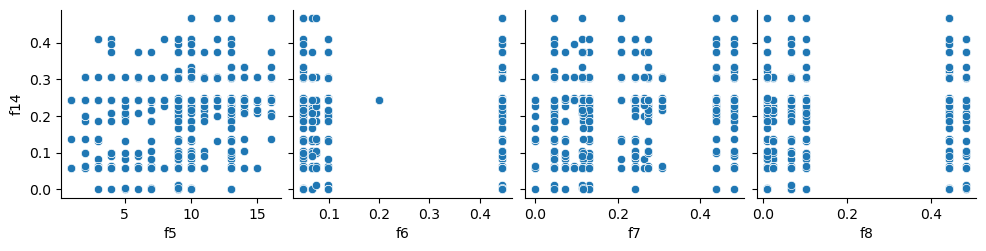

In [53]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f5', 'f6', 'f7', 'f8'],
    y_vars = ['f14'],
)

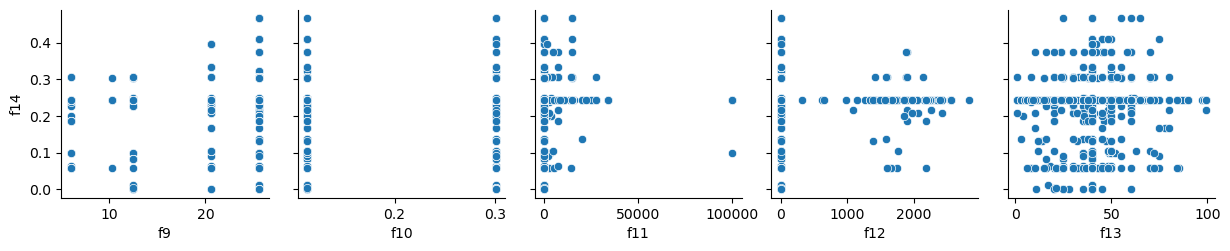

In [54]:
seaborn.pairplot(
    df_copy,
    x_vars = ['f9', 'f10', 'f11', 'f12', 'f13'],
    y_vars = ['f14'],
)

# Выводы из графического анализа
### 1) Переменная f6 имеет выбросы при значении 0,2
### 2) переменная f11 имеет выбросы при заченияи 100000

In [55]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries
boundaries = calculate_outliers(df_copy.f11)
boundaries

(0.0, 0.0)

In [56]:
boundaries1 = calculate_outliers(df_copy.f6)
boundaries1

(-0.544721565026263, 1.0388748238325118)

### 3. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче? 

In [57]:
X = df_copy.drop('target', axis=1)
y = df_copy['target']

In [58]:
# Ваш код здесь
len(y[y == 0])

4238

In [59]:
len(y[y == 1])

1329

# Ответ на вопрос:
Метрику точности accuracy нельзя применять для несбалансированных данных, в этом случае лучше применять f1-метрику. Эта метрика учитывает не только точность но и полноту, поэтому для несбалансированных данных позволяет находить наиболее адаекватное решение.

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test); 
- обучите KNN, LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test) и вычислите значение метрики f1.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=123)

In [61]:
from sklearn.metrics import f1_score

In [62]:
model1 = LogisticRegression()

In [63]:
model1.fit(X_train, y_train)

LogisticRegression()

In [64]:
y_pred_train1 = model1.predict(X_train)

In [65]:
y_pred_test1 = model1.predict(X_test)

In [66]:
print('Точность для обучающей выборки:', f1_score(y_train, y_pred_train1))
print('Точность для тестовой выборки:', f1_score(y_test, y_pred_test1))

Точность для обучающей выборки: 0.3686982693754703
Точность для тестовой выборки: 0.3645083932853717


In [67]:
model2 = KNeighborsClassifier()

In [68]:
model2.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
y_pred_train2 = model2.predict(X_train)

In [70]:
y_pred_test2 = model2.predict(X_test)

In [71]:
print('Точность для обучающей выборки:', f1_score(y_train, y_pred_train2))
print('Точность для тестовой выборки:', f1_score(y_test, y_pred_test2))

Точность для обучающей выборки: 0.46227056424201224
Точность для тестовой выборки: 0.3554603854389722


In [72]:
model3 = SVC()

In [73]:
model3.fit(X_train, y_train)

SVC()

In [74]:
y_pred_train3 = model3.predict(X_train)

In [75]:
y_pred_test3 = model3.predict(X_test)

In [76]:
print('Точность для обучающей выборки:', f1_score(y_train, y_pred_train3))
print('Точность для тестовой выборки:', f1_score(y_test, y_pred_test3))

Точность для обучающей выборки: 0.04784688995215311
Точность для тестовой выборки: 0.0438871473354232


### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете подбирать гиперпараметры моделей (лучше это делать по кросс-валидации на Train, то есть с помощью использования GridSearchCV на Train);
- можете задавать class_weights;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

In [77]:
# Ваш код здесь
is_outlier1 = df_copy.f11 >= 50000
is_outlier2 = ((df_copy.f6 >= 0.19) & (df_copy.f6 <= 0.21))
print('Количество выбросов в переменных f11 и f6', is_outlier1.sum(), is_outlier2.sum())

Количество выбросов в переменных f11 и f6 23 4


In [78]:
df_copy = df_copy[~(is_outlier1)]
df_copy = df_copy[~(is_outlier2)]
df_copy.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0


In [79]:
is_outlier1 = df_copy.f11 >= 50000
is_outlier2 = ((df_copy.f6 >= 0.19) & (df_copy.f6 <= 0.21))
print('Количество выбросов в переменных f11 и f6', is_outlier1.sum(), is_outlier2.sum())

Количество выбросов в переменных f11 и f6 0 0


In [80]:
X = df_copy.drop('target', axis=1)
y = df_copy['target']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=123)

In [82]:
model1 = LogisticRegression()

In [83]:
model1.fit(X_train, y_train)

LogisticRegression()

In [84]:
model2 = KNeighborsClassifier()

In [85]:
model2.fit(X_train, y_train)

KNeighborsClassifier()

In [86]:
model3 = SVC()

In [87]:
model3.fit(X_train, y_train)

SVC()

In [88]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    #'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'class_weight': ['balanced', None],
    'kernel': ['rbf', 'sigmoid']
}

In [89]:
#Подберем лучшие параметры для метода опорных векторов
grid_search = GridSearchCV(estimator=model3, param_grid=param_grid, cv=5, scoring='f1')

In [90]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'kernel': ['rbf', 'sigmoid']},
             scoring='f1')

In [91]:
print('Лучшие параметры для Support Vector Machine: ', grid_search.best_params_)

Лучшие параметры для Support Vector Machine:  {'C': 100, 'class_weight': 'balanced', 'kernel': 'rbf'}


In [92]:
best_model = grid_search.best_estimator_

In [93]:
accuracy = best_model.score(X_test, y_test)

In [94]:
print('Точность на тестовой выборке: ', accuracy)

Точность на тестовой выборке:  0.7848375451263538


In [95]:
#Подберем лучшие параметры для логистической регрессии
param_grid1 = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [96]:
grid_search1 = GridSearchCV(estimator=model1, param_grid=param_grid1, cv=5, scoring='f1')

In [97]:
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [98]:
print('Лучшие параметры для Logistic Regression: ', grid_search1.best_params_)

Лучшие параметры для Logistic Regression:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [99]:
best_model1 = grid_search1.best_estimator_

In [100]:
f1_1 = best_model1.score(X_test, y_test)

In [101]:
print('Точность на тестовой выборке: ', f1_1)

Точность на тестовой выборке:  0.8368231046931408


In [102]:
#Подберем лучшие параметры для метода ближайших соседей
param_grid2 = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [103]:
grid_search2 = GridSearchCV(estimator=model2, param_grid=param_grid2, cv=5, scoring='f1')

In [104]:
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [105]:
print('Лучшие параметры для Logistic Regression: ', grid_search2.best_params_)

Лучшие параметры для Logistic Regression:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [106]:
best_model2 = grid_search1.best_estimator_

In [107]:
f1_2 = best_model1.score(X_test, y_test)

In [108]:
print('Точность на тестовой выборке: ', f1_2)

Точность на тестовой выборке:  0.8368231046931408


### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

In [109]:
# Ваш код здесь
X1 = Xtest.drop('target', axis=1)
y1 = Xtest['target']

In [110]:
preds_proba1 = best_model1.predict_proba(X1)[:, 1]
preds1 = best_model1.predict(X1)

In [111]:
print('Точность для тестовой выборки:', f1_score(y1, preds1))

Точность для тестовой выборки: 0.24404761904761904


In [112]:
preds_proba2 = best_model2.predict_proba(X1)[:, 1]
preds2 = best_model2.predict(X1)

In [113]:
print('Точность для тестовой выборки:', f1_score(y1, preds2))

Точность для тестовой выборки: 0.24404761904761904


In [114]:
preds3 = best_model.predict(X1)

In [115]:
print('Точность для тестовой выборки:', f1_score(y1, preds3))

Точность для тестовой выборки: 0.4014084507042254


### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2$$.

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [116]:
def blend_preds(preds2, preds3, alpha):
    return alpha * preds_proba2 + (1 - alpha) * preds3

In [117]:
# Ваш код здесь
best_alpha = 0
best_f1 = 0
for alpha in np.linspace(0, 1, 100):
    blended_probs = blend_preds(preds2, preds3, alpha)
    blended_preds = (blended_probs > 0.5).astype(int)
    f1 = f1_score(y1, blended_preds)
    
    if f1 > best_f1:
        best_f1 = f1
        best_alpha = alpha
        
print(f'Лучшее значение alpha: {best_alpha}, лучшая точность: {best_f1}')

Лучшее значение alpha: 0.6666666666666667, лучшая точность: 0.4090909090909091


### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке? 
- Ваша модель переобучилась, недообучилась или обучилась как надо?

# Ответы на вопросы:
## 1)
Для того, чтобы улучшить предсказательные способности используемых моделей я использовал подбор различных параметров, таких как гиперпараметр С, solver, penalty и др., при помощи GridSearchCV на кросс-валидации. Данных подход позволил найти наилучшие параметры используемых моделей.
## 2)
Применение описанного в пункте 1 подхода позволило сущственно улучшить предсказание на тестовых данных. Например, при использовании при использовании модели опопрных векторов показания метрики f1 увеличились с 0,05141 до 0,79735.
## 3)
Качество предсказания на отложенной выборке существенно хуже, по сравнению с тестовыми данными. Однако находится на удовлетворительном уровне. Значение f1-метрики находится на уровне 0.4.
## 4)
На мой взгляд модель недообучилась, т.к. не очень хорошо предсказывает данными на отложенных данных. Здесь необходимо использовать комбинированный подход, привлекая данные при обучении модели, как из основной выборки, так и из отложенной (но в меньшей степени)

Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.